In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
def EMA(data, alpha=0.3):
    result = []
    for i, datum in enumerate(data):
        if i == 0:
            result.append(datum)
        else:
            result.append(alpha*datum+(1-alpha)*result[-1])
    return result

In [4]:
def fft(deg_list):
    Ts = 0.025
    Fs = 1/Ts
    n = len(deg_list)
    k = np.arange(n)
    T = n/Fs
    
    freq = k/T
    freq = freq[range(1,n//2)]
    fft_data = np.fft.fft(deg_list)/n
    fft_data = fft_data[range(1,n//2)]
    fft_mag_data = np.abs(fft_data)
    most_freq = freq[np.argmax(fft_mag_data)]
    x = np.arange(n)*Ts
    sigma = np.max(fft_mag_data)/np.mean(fft_mag_data)
    plt.figure(figsize=(10,5))
    plt.subplot(2,1,1)
    plt.title('FFT')
    plt.plot(x, deg_list)
    plt.xlabel('sec')
    plt.ylabel('deg')
    plt.grid(True)

    plt.subplot(2,1,2)
    plt.grid(True)
    plt.ylabel('mag')
    plt.xlabel('frequency')
    plt.plot(freq, fft_mag_data, linestyle=' ', marker='^', linewidth=1)
    plt.vlines(freq, [0], fft_mag_data)
    plt.xlim([0, 4])
    plt.legend([f'most freq:{most_freq:2.3f}Hz', f'sigma: {sigma:5.2f}'])
    plt.show()

In [5]:
def load_data(name):
    F = pd.read_csv(name+'_frequency.csv')
    R = pd.read_csv(name+'_reward.csv')
    S = pd.read_csv(name+'_sigma.csv')
    result = R['Step'], F['Value'], R['Value'], S['Value'], name
    result = np.array([np.array(x) for x in result])
    return result

In [6]:
d1e4 = load_data('1e-4')
d2e4 = load_data('2e-4')
#d1e3 = load_data('1e-3')
d1e3 = pd.read_csv('1e-3_reward.csv')
d2e3 = load_data('02e-3')
d3e3 = load_data('3e-3')
d4e3 = load_data('4e-3')
d5e3 = load_data('5e-3')

<ipython-input-5-b2716e172e1d>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.array([np.array(x) for x in result])


In [7]:
def find_data(data):
    for i, step in enumerate(data[0]):
        step = int(step)
        if 0.3 <data[1][i] < 0.5 and data[3][i] > 100:
            end_step    = data[0][i]
            end_freq    = data[1][i]
            end_reward  = data[2][i]
            end_sigma   = data[3][i]
            max_step    = data[0][-1]

            print('max step is {} and ended in {}'.format(max_step, end_step))

            plt.figure(figsize=(10,10))
            plt.subplot(3,1,1)
            plt.title(data[-1], size=30)
            plt.plot(data[0], data[1], 'r')
            plt.grid(True)
            plt.ylabel('FFT')
            plt.axvline(end_step, 0, 1, color='red', linestyle=':', linewidth='3')

            plt.subplot(3,1,2)
            plt.plot(data[0], data[2], 'g')
            plt.grid(True)
            plt.ylabel('Reward')
            plt.axvline(end_step, 0, 1, color='red', linestyle=':', linewidth='3')

            plt.subplot(3,1,3)
            plt.plot(data[0], data[3], 'b')
            plt.grid(True)
            plt.ylabel('Sigma')
            plt.axvline(end_step, 0, 1, color='red', linestyle=':', linewidth='3')
            plt.show()
            print([end_step, end_freq, end_reward, end_sigma, max_step])
            return [end_step, end_freq, end_reward, end_sigma, max_step]
            break

max step is 7324 and ended in 4656


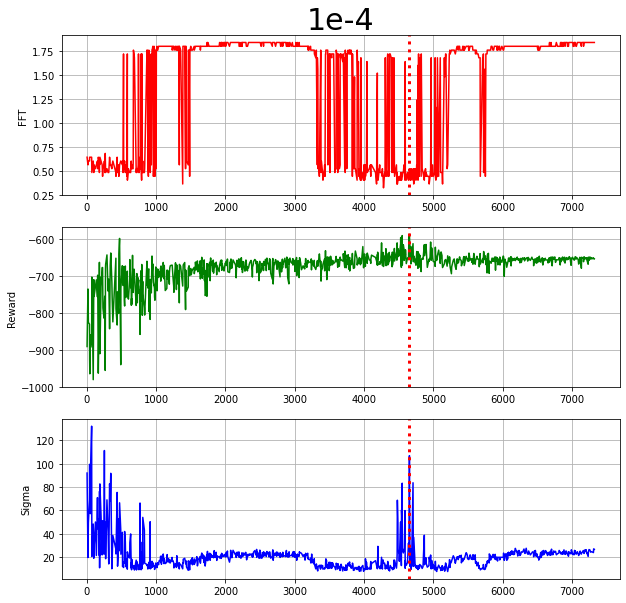

[4656, 0.4399999976158142, -588.4737548828125, 106.71056365966795, 7324]
max step is 8157 and ended in 2578


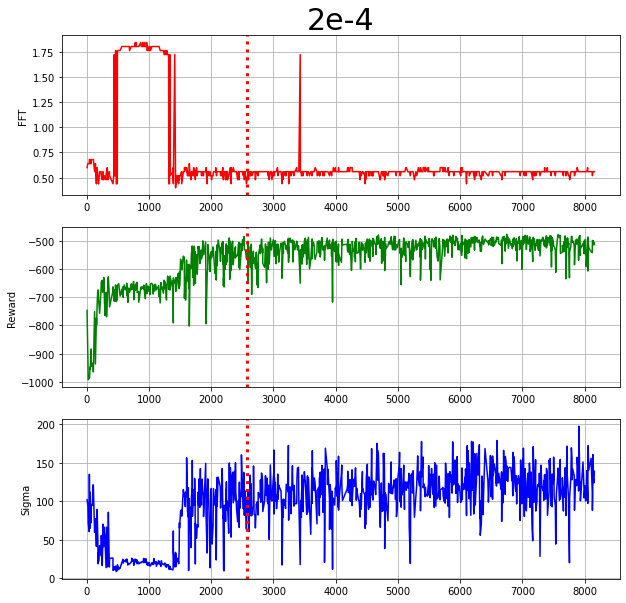

[2578, 0.4799999892711639, -550.05908203125, 105.2279052734375, 8157]
max step is 3319 and ended in 3031


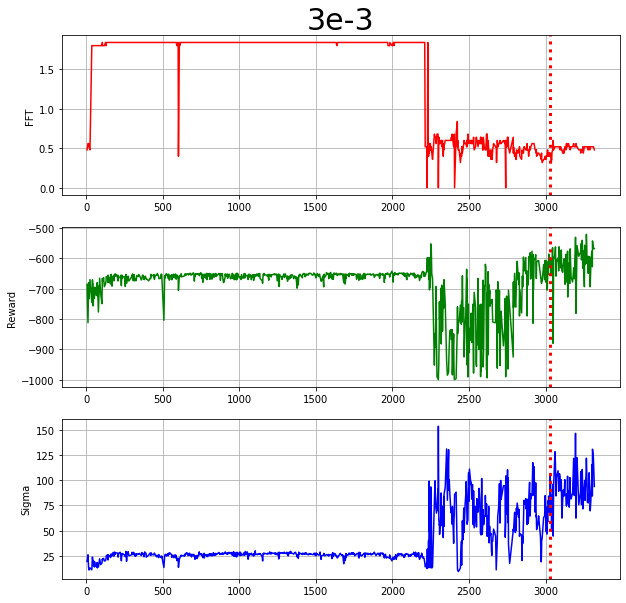

[3031, 0.4399999976158142, -599.2447509765625, 106.88943481445312, 3319]


In [8]:
result = []
result.append(find_data(d1e4))
result.append(find_data(d2e4))
#result.append(find_data(d2e3))
result.append(find_data(d3e3))
#result.append(find_data(d4e3))
#result.append(find_data(d5e3))

0.4399999976158142


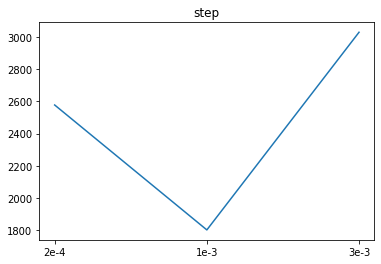

[2578, 1800, 3031]


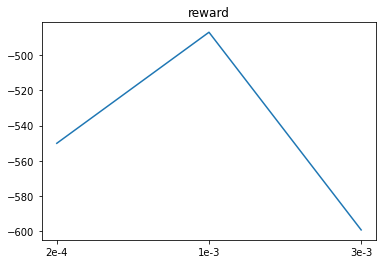

[-550.05908203125, -487, -599.2447509765625]


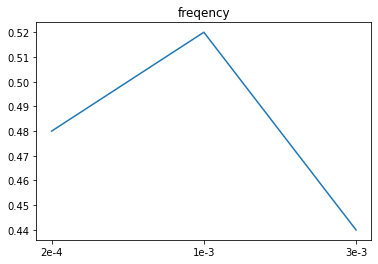

[0.4799999892711639, 0.52, 0.4399999976158142]


In [9]:
print(result[2][1])
plt.title('step')
plt.plot(['2e-4','1e-3','3e-3'], [result[1][0], 1800, result[2][0]])
plt.show()
print([result[1][0], 1800, result[2][0]])
plt.title('reward')
plt.plot(['2e-4','1e-3','3e-3'], [result[1][2],  -487,result[2][2]])
plt.show()
print([result[1][2],  -487,result[2][2]])
plt.title('freqency')
plt.plot(['2e-4','1e-3','3e-3'], [result[1][1], 0.52, result[2][1]])
plt.show()
print([result[1][1], 0.52, result[2][1]])

0.4399999976158142


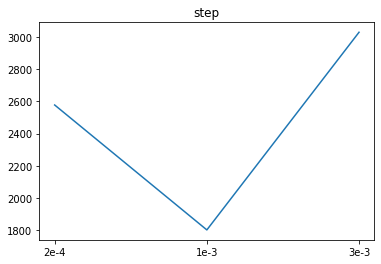

[2578, 1800, 3031]


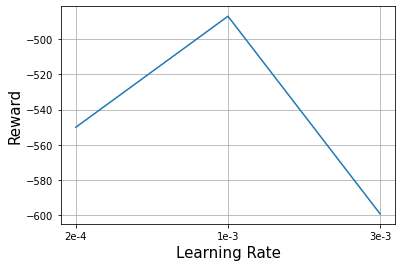

[-550.05908203125, -487, -599.2447509765625]


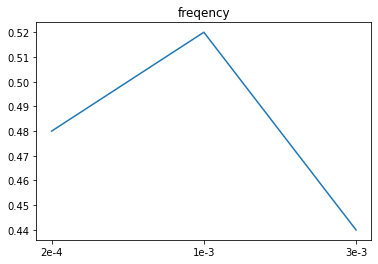

[0.4799999892711639, 0.52, 0.4399999976158142]


In [10]:
print(result[2][1])
plt.title('step')
plt.plot(['2e-4','1e-3','3e-3'], [result[1][0], 1800, result[2][0]])
plt.show()
print([result[1][0], 1800, result[2][0]])
plt.plot(['2e-4','1e-3','3e-3'], [result[1][2],  -487,result[2][2]])
plt.grid(True)
plt.ylabel('Reward', size=15)
plt.xlabel('Learning Rate', size=15)
plt.show()
print([result[1][2],  -487,result[2][2]])
plt.title('freqency')
plt.plot(['2e-4','1e-3','3e-3'], [result[1][1], 0.52, result[2][1]])
plt.show()
print([result[1][1], 0.52, result[2][1]])

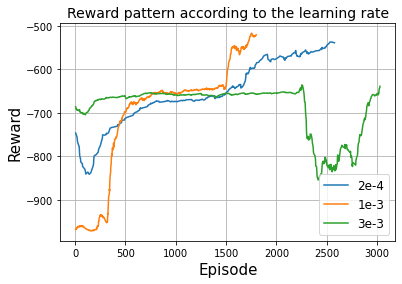

In [18]:
plt.plot(d2e4[0][d2e4[0]<=2578], EMA(d2e4[2][d2e4[0]<=2578],0.05),
d1e3['Step'], EMA(d1e3['Value'],0.05),
d3e3[0][d3e3[0]<=3031], EMA(d3e3[2][d3e3[0]<=3031],0.05))
plt.grid(True)
plt.title('Reward pattern according to the learning rate', size=14)
plt.ylabel('Reward', size=15)
plt.xlabel('Episode', size=15)
plt.legend(['2e-4', '1e-3', '3e-3'], loc=4, prop={'size':12})
plt.show()